In [2]:
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Read data

In [3]:
sale = pd.read_excel('Sales.xlsx')
sale.head(5)

,Quarter,Quantity,Sale
0,2021Q1,735,68.0022
1,2021Q2,330,30.5316
2,2021Q3,560,57.5680
3,2021Q4,750,77.1000
4,2022Q1,730,75.0440


In [4]:
# Convert 'Quarter' to datetime and set it as the index
sale['Quarter'] = pd.to_datetime(sale['Quarter'].str.replace('Q', '-'), format='%Y-%m')
sale = sale.set_index('Quarter')


In [5]:
sale.head(5)

,Quantity,Sale
Quarter,,
2021-01-01,735,68.0022
2021-02-01,330,30.5316
2021-03-01,560,57.5680
2021-04-01,750,77.1000
2022-01-01,730,75.0440


# Step 1: Defind the p,d,q

## 1.1 TRend decompose trend, seasonal, resid


In [6]:
result2 = seasonal_decompose(sale['Sale'], model='addictive', period=4)
result = seasonal_decompose(sale['Quantity'], model='addictive',period=4)

## 1.2 Plot


### Quantity

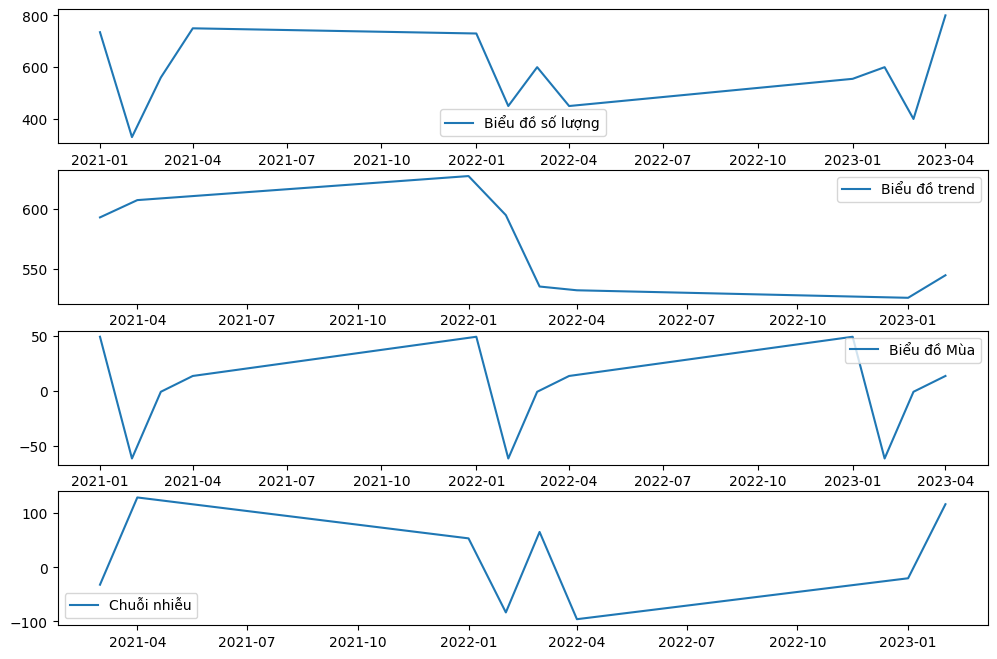

In [7]:
# Dãy Quantity

plt.figure(figsize=(12, 8))

# Biểu đồ số lượng
plt.subplot(4, 1, 1)
plt.plot(sale['Quantity'], label='Biểu đồ số lượng')
plt.legend()

# Tách trend
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Biểu đồ trend')
plt.legend()

# Tách mùa
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Biểu đồ Mùa')
plt.legend()

# Tách nhiễu
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Chuỗi nhiễu')
plt.legend()

plt.show()


### Sale

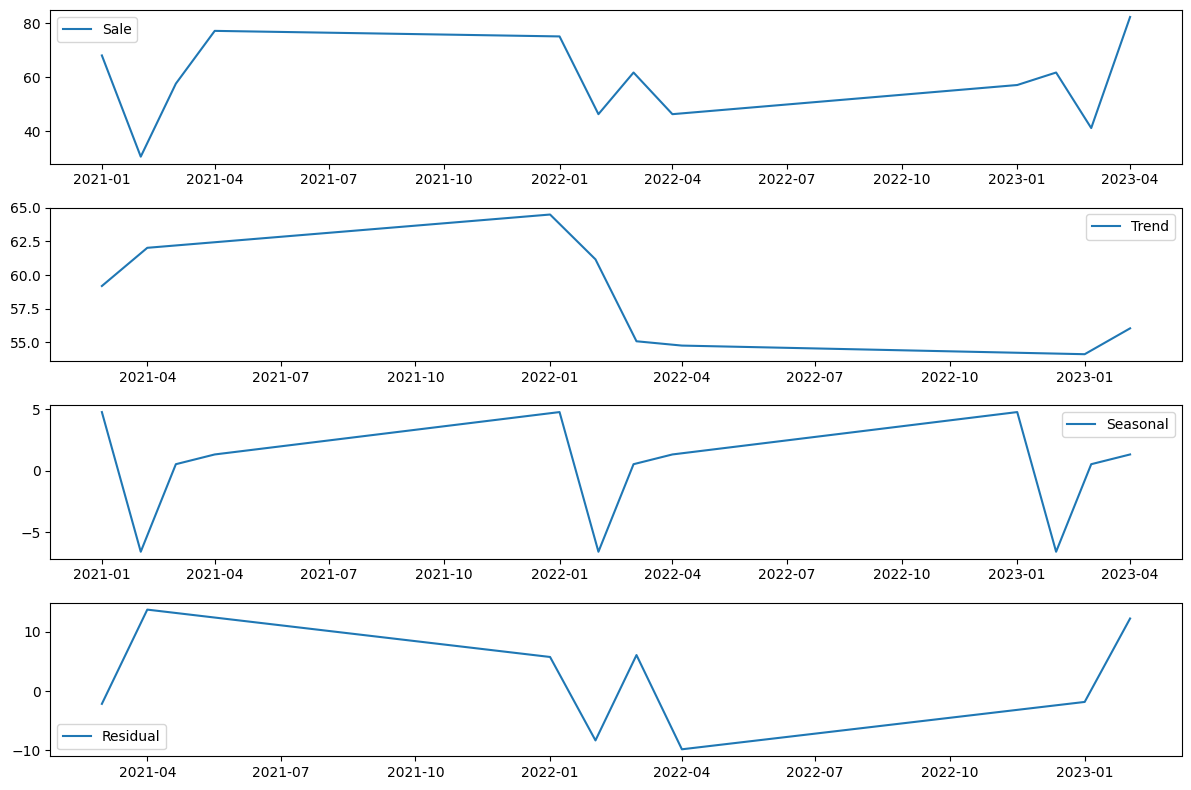

In [8]:
import matplotlib.pyplot as plt

# Dãy sale
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Biểu đồ sale
plt.subplot(4, 1, 1)
plt.plot(sale['Sale'], label='Sale')
plt.legend()

# Biểu đồ Trend
plt.subplot(4, 1, 2)
plt.plot(result2.trend, label='Trend')
plt.legend()

# Biểu đồ Mùa
plt.subplot(4, 1, 3)
plt.plot(result2.seasonal, label='Seasonal')
plt.legend()

# Biểu đồ Nhiễu
plt.subplot(4, 1, 4)
plt.plot(result2.resid, label='Residual')  # Fix the label to 'Residual'
plt.legend()

plt.tight_layout()
plt.show()


### Note:
- Both of series dont have the trend anh the seasonal



## 1.3 Check the staionary


### Quantity

In [9]:
adf1 = adfuller(sale['Quantity'], regression='c', maxlag = 4)
print(f"ADF Stat: {adf1[0]}")
print(f"P-value: {adf1[1]}")

ADF Stat: -3.5590826851859325
P-value: 0.006593221180946816


### Note:
-> the Quantity series is Stationary

### Sales

In [10]:
adf2 = adfuller(sale['Sale'], regression='c', maxlag = 4)
print(f"ADF Stat: {adf1[0]}")
print(f"P-value: {adf1[1]}")

ADF Stat: -3.5590826851859325
P-value: 0.006593221180946816


### Note:
- the Sale is stationary


## Sale

In [11]:
sale_sale = sale['Sale']

###  ACF,PACF

### PACF and ACF of SALE


In [12]:
sale_sale

Quarter
2021-01-01    68.0022
2021-02-01    30.5316
2021-03-01    57.5680
2021-04-01    77.1000
2022-01-01    75.0440
2022-02-01    46.2600
2022-03-01    61.6800
2022-04-01    46.2600
2023-01-01    57.0540
2023-02-01    61.6800
2023-03-01    41.1200
2023-04-01    82.2400
Name: Sale, dtype: float64

#### Lib

In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Biểu đồ PACF')

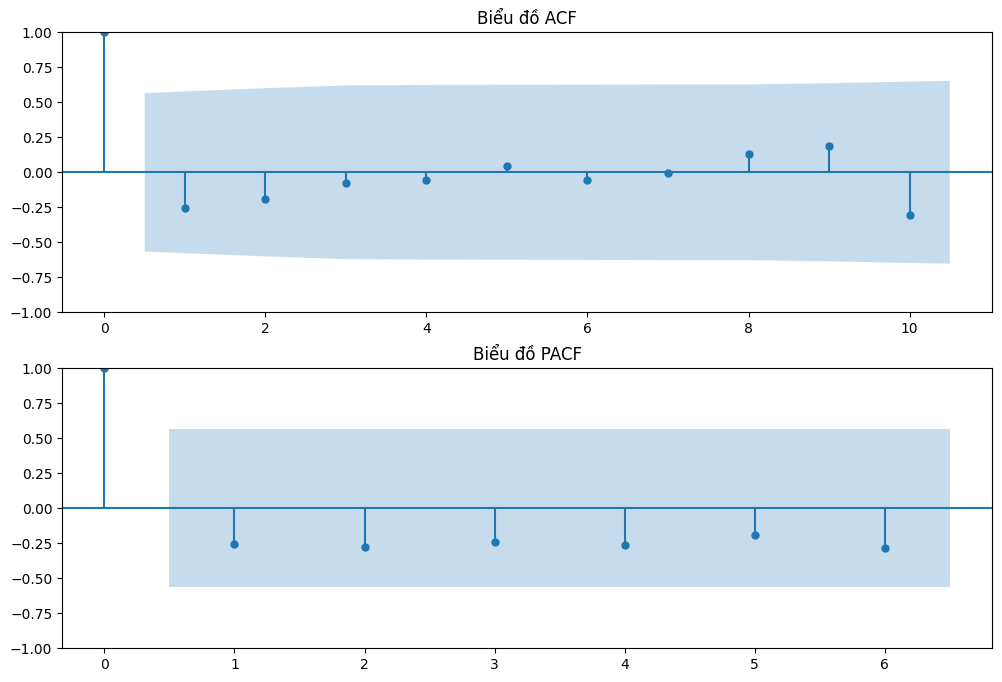

In [14]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (12,8))
plot_acf(sale_sale, lags=10, ax = ax1)
ax1.set_title('Biểu đồ ACF')
plot_pacf(sale_sale, lags=6, ax = ax2)
ax2.set_title('Biểu đồ PACF')
# plot_acf(sale_sale, lags = 5)
# plot_pacf(sale_sale, lags = 5)

#### Nhận xét:
Pick the p,d for Sale series
- ACF:  q: 1, 9, 10
- PACF:  p: 1, 2, 3

### Estimate model ARIMA for  Sale
- Model:
    - ARIMA(1,0,1), ARIMA(1,0,9), ARIMA(1,0,10)
    - ARIMA(2,0,1), ARIMA(2,0,9), ARIMA(2,0,10)
    - ARIMA(3,0,1), ARIMA(3,0,9), ARIMA(3,0,10)
    

### Thư viện


In [15]:
# Import mô hình ARIMA
from statsmodels.tsa.arima.model import ARIMA

### ARIMA(1,0,1)

In [16]:

model_sale_1  = ARIMA(sale_sale, order=(1,0,1)).fit()

print(model_sale_1.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -47.193
Date:                Tue, 16 Jan 2024   AIC                            102.386
Time:                        16:07:28   BIC                            104.326
Sample:                             0   HQIC                           101.668
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2193      1.113     52.285      0.000      56.037      60.402
ar.L1          0.1903      0.530      0.359      0.720      -0.848       1.229
ma.L1         -0.9996    309.998     -0.003      0.9

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

#### Nhận xét: 
Với mô hình ARIMA(1,0,1)
- Các tham số không có tính thống kê (P-value lớn ở MA(1))
- Mô hình không có tính ARCH
- Cần thử các mô hình khác 


### ARIMA(1,0,9)

In [17]:
model_sale_2 = ARIMA(sale_sale, order=(1,0,[9])).fit()
print(model_sale_2.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:               ARIMA(1, 0, [9])   Log Likelihood                 -48.718
Date:                Tue, 16 Jan 2024   AIC                            105.437
Time:                        16:07:28   BIC                            107.376
Sample:                             0   HQIC                           104.719
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.6433      5.052     11.609      0.000      48.742      68.544
ar.L1         -0.1980      0.505     -0.392      0.695      -1.188       0.792
ma.L9          0.4798      1.192      0.403      0.6

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

#### Nhận xét:
- Mô hình hơi đểu, các hệ số có P-value lớn -> không có ý nghĩa về thống kê
- Mô hình không có tương quan (JB test)
- Phần dư tuân theo phân phối chuẩn 
- Mô hình không có tính ARCH 
-> Cần thêm mô hình khác 

### ARIMA(1,0,10)


In [18]:
model_sale_3 = ARIMA(sale_sale, order = (1,0,[10])).fit()
print(model_sale_3.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:              ARIMA(1, 0, [10])   Log Likelihood                 -47.588
Date:                Tue, 16 Jan 2024   AIC                            103.175
Time:                        16:07:28   BIC                            105.115
Sample:                             0   HQIC                           102.457
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.6111      3.541     16.270      0.000      50.671      64.551
ar.L1         -0.2139      0.387     -0.553      0.580      -0.972       0.544
ma.L10        -0.9990   1050.276     -0.001      0.9

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

#### Nhận xét:


### ARIMA(2,0,1)

In [19]:
model_sale_4 = ARIMA(sale_sale,order=([2],0,1)).fit()
print(model_sale_4.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:               ARIMA([2], 0, 1)   Log Likelihood                 -47.191
Date:                Tue, 16 Jan 2024   AIC                            102.383
Time:                        16:07:28   BIC                            104.322
Sample:                             0   HQIC                           101.664
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.3157      0.827     70.557      0.000      56.696      59.936
ar.L2         -0.2152      0.360     -0.598      0.550      -0.920       0.490
ma.L1         -0.9990    103.592     -0.010      0.9

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### Nhận xét:

### ARIMA(2,0,9)

In [20]:
model_sale_5 = ARIMA(sale_sale, order=([2],0,[9])).fit()
print(model_sale_5.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:             ARIMA([2], 0, [9])   Log Likelihood                 -48.246
Date:                Tue, 16 Jan 2024   AIC                            104.492
Time:                        16:07:28   BIC                            106.432
Sample:                             0   HQIC                           103.774
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.9189      4.165     14.147      0.000      50.756      67.082
ar.L2         -0.4054      0.440     -0.921      0.357      -1.268       0.457
ma.L9          0.9971    439.478      0.002      0.9

#### Nhận xét:


### ARIMA(2,0,10)

In [21]:
model_sale_6 = ARIMA(sale_sale,order=(2,0,[10])).fit()
print(model_sale_6.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:              ARIMA(2, 0, [10])   Log Likelihood                 -47.054
Date:                Tue, 16 Jan 2024   AIC                            104.108
Time:                        16:07:28   BIC                            106.533
Sample:                             0   HQIC                           103.211
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.0419      3.094     18.759      0.000      51.978      64.106
ar.L1         -0.2571      0.394     -0.653      0.514      -1.028       0.514
ar.L2         -0.3147      0.394     -0.799      0.4

#### Nhận xét

### ARIMA(3,0,1)

In [22]:
model_sale_7 = ARIMA(sale_sale, order = ([3],0,1)).fit()
print(model_sale_7.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:               ARIMA([3], 0, 1)   Log Likelihood                 -46.900
Date:                Tue, 16 Jan 2024   AIC                            101.801
Time:                        16:07:28   BIC                            103.740
Sample:                             0   HQIC                           101.083
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2357      1.028     56.655      0.000      56.221      60.250
ar.L3         -0.3360      0.378     -0.889      0.374      -1.077       0.404
ma.L1         -0.9997    462.602     -0.002      0.9

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### Nhận xét:


### ARIMA(3,0,9)


In [23]:
model_sale_8 = ARIMA(sale_sale, order=([3],0,[9])).fit()
print(model_sale_8.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:             ARIMA([3], 0, [9])   Log Likelihood                 -48.798
Date:                Tue, 16 Jan 2024   AIC                            105.597
Time:                        16:07:28   BIC                            107.536
Sample:                             0   HQIC                           104.879
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1356      4.813     12.287      0.000      49.702      68.569
ar.L3         -0.1427      0.585     -0.244      0.807      -1.288       1.003
ma.L9          0.8214      4.856      0.169      0.8

### ARIMA(3,0,10)

In [24]:
model_sale_9 = ARIMA(sale_sale, order=([3],0,[10])).fit()
print(model_sale_9.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                                SARIMAX Results                                
Dep. Variable:                    Sale   No. Observations:                   12
Model:             ARIMA([3], 0, [10])   Log Likelihood                 -47.809
Date:                 Tue, 16 Jan 2024   AIC                            103.618
Time:                         16:07:29   BIC                            105.558
Sample:                              0   HQIC                           102.900
                                  - 12                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.0556      3.436     16.896      0.000      51.321      64.790
ar.L3         -0.1026      0.368     -0.279      0.780      -0.823       0.618
ma.L10        -0.9994   1312.839     -0.001 

### ARIMA(3,0,0)

In [25]:
model_sale_10 = ARIMA(sale_sale, order = ([3],0,0)).fit()
print(model_sale_10.summary())

                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                   12
Model:               ARIMA([3], 0, 0)   Log Likelihood                 -49.414
Date:                Tue, 16 Jan 2024   AIC                            104.828
Time:                        16:07:29   BIC                            106.283
Sample:                             0   HQIC                           104.290
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8292      4.010     14.669      0.000      50.969      66.690
ar.L3         -0.1351      0.431     -0.314      0.754      -0.979       0.709
sigma2       219.9071    118.971      1.848      0.0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Quantity

In [26]:
sale_quan = sale['Quantity']

#### Thư viện

In [27]:
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

### Vẽ biểu đồ ACF và PACF


Text(0.5, 1.0, 'Biểu đồ PACF')

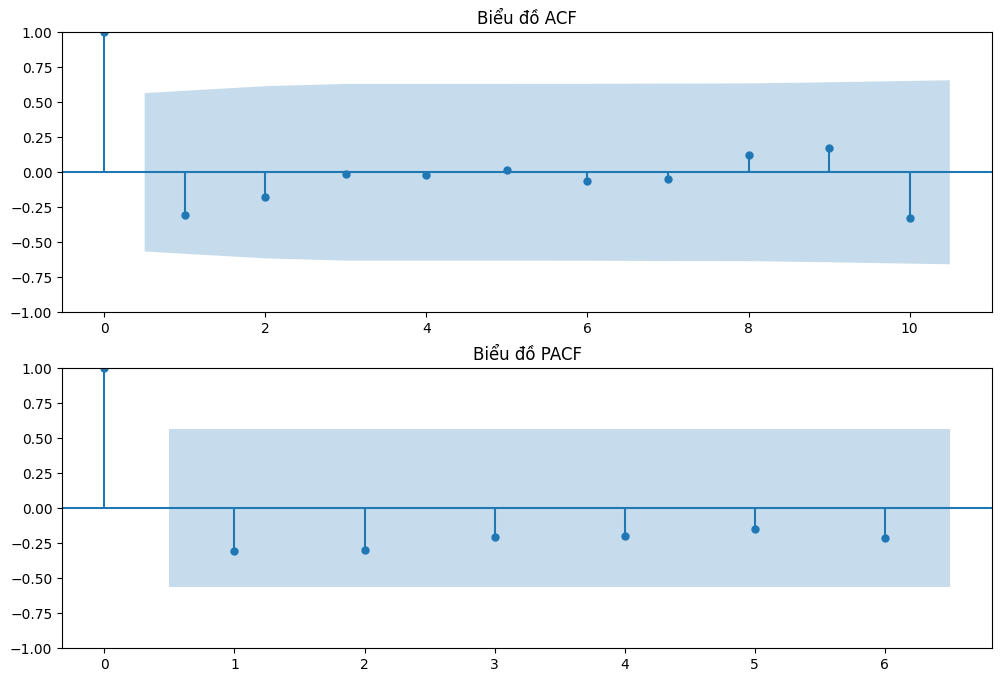

In [28]:
fig, (ax1,ax2) =plt.subplots(2,1,figsize=(12,8)) 
plot_acf(sale_quan, lags=10, ax = ax1)
ax1.set_title('Biểu đồ ACF')

plot_pacf(sale_quan, lags=6, ax = ax2)
ax2.set_title('Biểu đồ PACF')


### Note:
Pick the parameter p and q
- p: 1, 2
- q: 1 ,10


### Estimate ARIMA model

- ARIMA model that may fit:
    - ARIMA(1,0,1), ARIMA(1,0,10)
    - ARIMA(2,0,1), ARIMA(2,0,10)

#### ARIMA(1,1,1)

In [29]:
model_quantity_1 = ARIMA(sale_quan, order=(1,0,1)).fit()
print(model_quantity_1.summary())


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -74.470
Date:                Tue, 16 Jan 2024   AIC                            156.941
Time:                        16:07:29   BIC                            158.880
Sample:                             0   HQIC                           156.223
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        571.1145     10.029     56.948      0.000     551.459     590.770
ar.L1          0.1743      0.553      0.315      0.753      -0.910       1.258
ma.L1         -0.9971     37.698     -0.026      0.9

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### Note:
- both parameter are statistically insignificant


#### ARIMA(2,1,1)

In [30]:
model_quantity_2 = ARIMA(sale_quan, order=(2,0,1)).fit()
print(model_quantity_2.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -74.421
Date:                Tue, 16 Jan 2024   AIC                            158.841
Time:                        16:07:29   BIC                            161.266
Sample:                             0   HQIC                           157.944
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        571.8442     10.415     54.907      0.000     551.432     592.257
ar.L1          0.1930      0.667      0.289      0.772      -1.114       1.500
ar.L2         -0.1105      0.509     -0.217      0.8

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

#### ARIMA(1,1,10)

In [31]:
model_quantity_3 = ARIMA(sale_quan, order=(1,0,[10])).fit()
print(model_quantity_3.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   12
Model:              ARIMA(1, 0, [10])   Log Likelihood                 -74.607
Date:                Tue, 16 Jan 2024   AIC                            157.214
Time:                        16:07:29   BIC                            159.154
Sample:                             0   HQIC                           156.496
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        571.5815     31.803     17.973      0.000     509.249     633.914
ar.L1         -0.2741      0.316     -0.868      0.385      -0.893       0.345
ma.L10        -0.9975    383.574     -0.003      0.9

#### ARIMA(2,1,10)

In [32]:
model_quantity_4 = ARIMA(sale_quan, order=(2,0,[10])).fit()
print(model_quantity_4.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   12
Model:              ARIMA(2, 0, [10])   Log Likelihood                 -74.049
Date:                Tue, 16 Jan 2024   AIC                            158.097
Time:                        16:07:29   BIC                            160.522
Sample:                             0   HQIC                           157.199
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        573.0147     27.196     21.070      0.000     519.712     626.317
ar.L1         -0.3283      0.329     -0.997      0.319      -0.974       0.317
ar.L2         -0.3143      0.489     -0.642      0.5